In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### Spotipy

In [2]:
secrets_file = open("SpotifySecret.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['cs']))

In [6]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

I will mix several TOP song lists

In [7]:
plIds = ["37i9dQZEVXbMDoHDwVN2tF","4NLrcCMFyUgtXor7EjlE7d","5ZyAjPmaz9KOB4f73RFYvi","6MJSGcF4iV79gyo8xZpd8U", 
         "6CfQ2Ptcxju9l6YC2LXzUb", "4hNaqkezNNv7ImufYGHgkf", "1zrx1DCawPLg6Y8AMFgCUZ"]

In [8]:
#Combining all lists in one
all_tracks = []
for i in range(len(plIds)):
    all_tracks = all_tracks + (get_playlist_tracks(plIds[i]))

In [9]:
len(all_tracks)

1006

In [11]:
title = []
artist = []
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []


for i in range(len(all_tracks)):
    title.append(all_tracks[i]["track"]["name"])
    artist.append(all_tracks[i]['track']['artists'][0]['name'])
    song_uri = all_tracks[i]["track"]["uri"]
    audio = sp.audio_features(song_uri)
    danceability.append(audio[0]['danceability'])
    energy.append(audio[0]['energy'])
    key.append(audio[0]['key'])
    loudness.append(audio[0]['loudness'])
    mode.append(audio[0]['mode'])
    speechiness.append(audio[0]['speechiness'])
    acousticness.append(audio[0]['acousticness'])
    instrumentalness.append(audio[0]['instrumentalness'])
    liveness.append(audio[0]['liveness'])
    valence.append(audio[0]['valence'])
    tempo.append(audio[0]['tempo'])
    sleep(randint(1,3))
    
audioFeatures = pd.DataFrame({"title":title,
                        "artist":artist,
                        "danceability":danceability,
                        "energy":energy,
                        "key":key,
                        "loudness":loudness,
                        "mode":mode,
                        "speechiness":speechiness,
                        "acousticness":acousticness,
                        "instrumentalness":instrumentalness,
                        "liveness":liveness,
                        "valence":valence,
                        "tempo":tempo
                      })

In [12]:
audioFeatures.shape

(1006, 13)

In [13]:
audioFeatures.head()

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Heat Waves,Glass Animals,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870
1,STAY (with Justin Bieber),The Kid LAROI,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928
2,abcdefu,GAYLE,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,0.415,121.932
3,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,0.555,77.011
4,Cold Heart - PNAU Remix,Elton John,0.795,0.800,1,-6.320,1,0.0309,0.0354,0.000073,0.0915,0.934,116.032


In [14]:
audioFeatures.isna().sum()

title               0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [15]:
#Searching for duplicates: I have combined several lists so it's likely that some songs are in more than one
print("Length of the dataset:", len(audioFeatures))
print("Length of the dataset without duplicates:", len(audioFeatures.drop_duplicates()))

Length of the dataset: 1006
Length of the dataset without duplicates: 990


In [17]:
#Droping duplicates
audioFeatures2 = audioFeatures.drop_duplicates()

In [18]:
#Droping the artist because I don´t need it this time
audioFeatures2 = audioFeatures2.drop(['artist'], axis=1)

### KMeans 

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [20]:
y = audioFeatures2['title']
X_audio = audioFeatures2.drop(['title'], axis=1)
X_audio.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870
1,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928
2,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,0.415,121.932
3,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,0.555,77.011
4,0.795,0.800,1,-6.320,1,0.0309,0.0354,0.000073,0.0915,0.934,116.032


In [21]:
X_prep = StandardScaler().fit_transform(X_audio)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X_audio.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.117772,-0.934699,1.651234,-0.050844,0.589015,0.670073,1.154038,-0.330234,-0.586386,-0.085115,-1.523642
1,-0.108662,0.333401,-1.201683,0.343277,0.589015,-0.201283,-0.597887,-0.330262,-0.505064,-0.310522,1.676193
2,0.641627,-0.855111,-0.345808,0.285384,0.589015,-0.182382,0.539098,-0.330262,1.464559,-0.578459,-0.048293
3,0.879700,0.434213,1.651234,0.638311,-1.697749,3.913562,0.268698,-0.330262,1.964425,0.016956,-1.662295
4,1.363059,0.524412,-1.201683,0.110590,0.589015,-0.530168,-0.610535,-0.329953,-0.590862,1.628832,-0.260279


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=4, random_state=1234)

In [23]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     58
1    641
2    210
3     81
dtype: int64

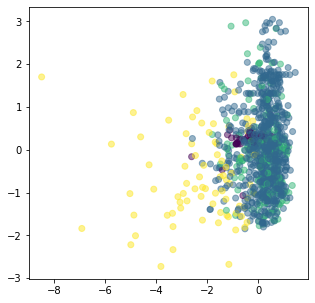

In [24]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 3], X_prep[:, 10], c=clusters,alpha=0.5)
plt.show()

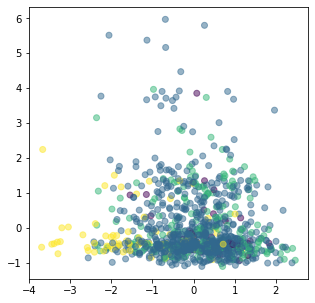

In [33]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 8], c=clusters,alpha=0.5)
plt.show()

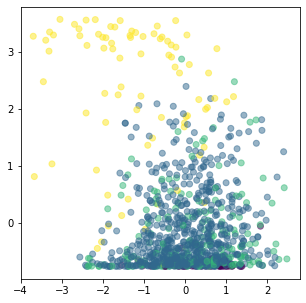

In [40]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 6], c=clusters,alpha=0.5)
plt.show()

In [25]:
kmeans.inertia_ 

7496.3934227684385

##### Choosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

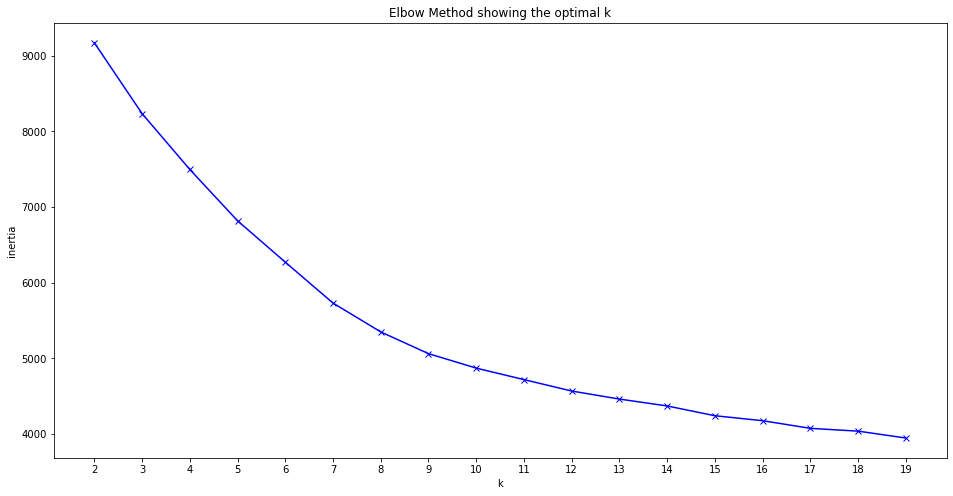

In [26]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

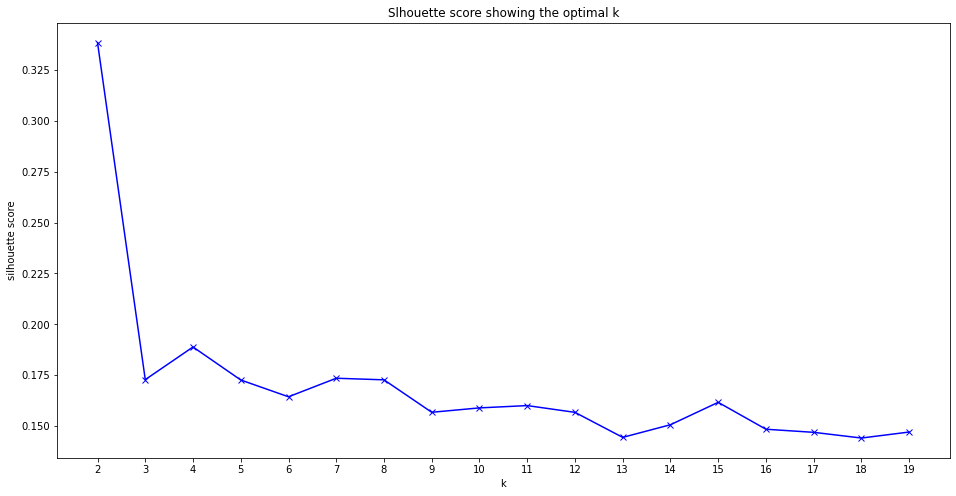

In [27]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

##### Aglomerative Clustering

In [28]:
X = X_audio.to_numpy()

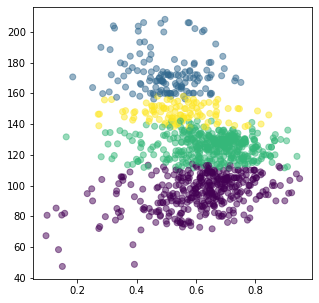

In [29]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 10], c=pred,alpha=0.5)
plt.show()

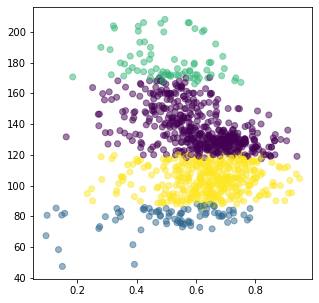

In [30]:
# complete linkage penalizes heavily outliers
agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='complete')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 10], c=pred,alpha=0.5)
plt.show()

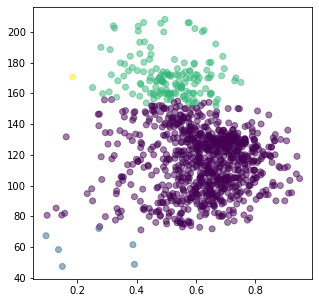

In [31]:
# different algorithms are good for different applications
agglomerative = cluster.AgglomerativeClustering(n_clusters=4,linkage='average')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 10], c=pred,alpha=0.5)
plt.show()

I can observe some differences among the different figures depending on the algorithm

Different algorithms are good for different applications - kmeans and single agglomerative have so far shown very different results


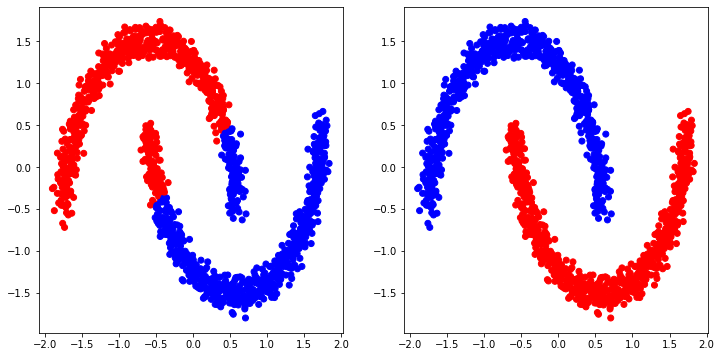

In [32]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
X = StandardScaler().fit_transform(X)

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y1_pred = kmeans.predict(X)


single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)


options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
charts[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
plt.show()